<a href="https://colab.research.google.com/github/rubenguerra/Asistente_Virtual/blob/master/prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programa que usa una red neuronal recurrente (Long Short Term Memory)-LSTM
para predecir el precio de cierre de una corporación usando el precio de los ultimos 60 días

In [1]:
# Importando las bibliotecas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
# Obteniendo las notas de stock

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.115936
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.390648
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.961189
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.504375
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.421093
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.769989
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,271.459991
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,275.149994


In [3]:
# Cuantas filas y columnas tiene el dataset
df.shape

(2003, 6)

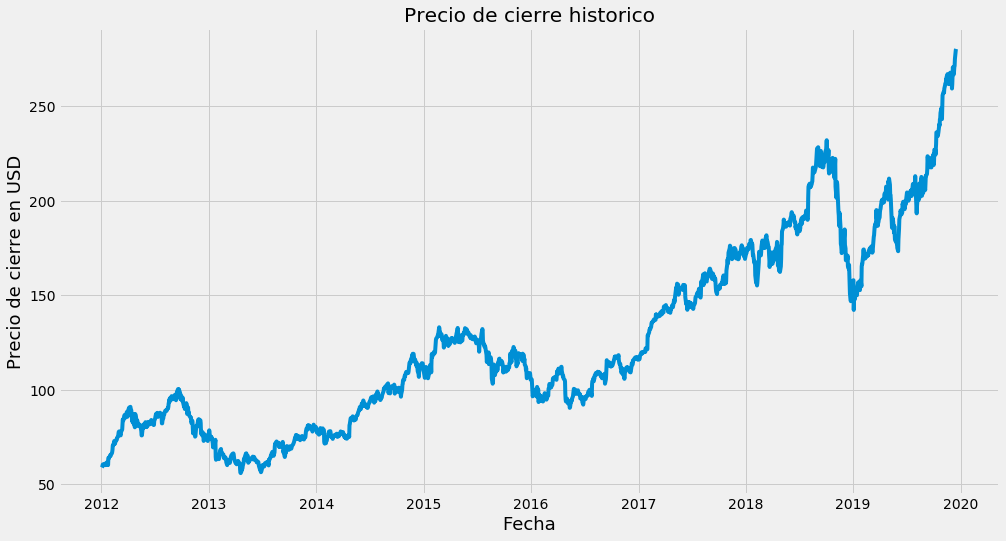

In [7]:
# Veamos el precio de cierre histórico
plt.figure(figsize=(15,8))
plt.title('Precio de cierre historico')
plt.plot(df['Close'])
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio de cierre en USD', fontsize=18)
plt.show()

In [8]:
# Creamos una nueva data solamente con la columna de cierre (Close)
data = df.filter(['Close'])
# Se convierte el dataframe en un arreglo
dataset = data.values
# Cogemos el numero de filas para entrenar el modelo
training_data_len = math.ceil(len(dataset) * .8) # EL 80 % de los datos para entrenar

training_data_len

1603

In [9]:
# Escalando los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [16]:
# Creamos el dataset de entrenamiento
# Escalado en valores de 0 a 1
train_data = scaled_data[0:training_data_len, :]
 # Reunimos los datos en conjuntos de datos: x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [0]:
# Convertir los set x_train y y_train en arreglos
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# Reformando los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [23]:
# Se construye el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
# Se compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Entrenamiento del modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1543/1543 [==============================] - 255s 166ms/step - loss: 0.0011


In [0]:
# Crear el data set de prueba
# Se crea un nuevo arreglo conteniendo los valores de índice 1543 hasta 2003

test_data = scaled_data[training_data_len - 60: , :]
# Crea el dataset x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [0]:
# Convierte el data en un arreglo de numpy
x_test = np.array(x_test)

In [0]:
# Reformando el data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
# Obtenemos los valores predichos por el modelo
predictions = model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [31]:
# Obtenemos el valor de RSMSE - root mean squared error
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

2.968442840576172

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


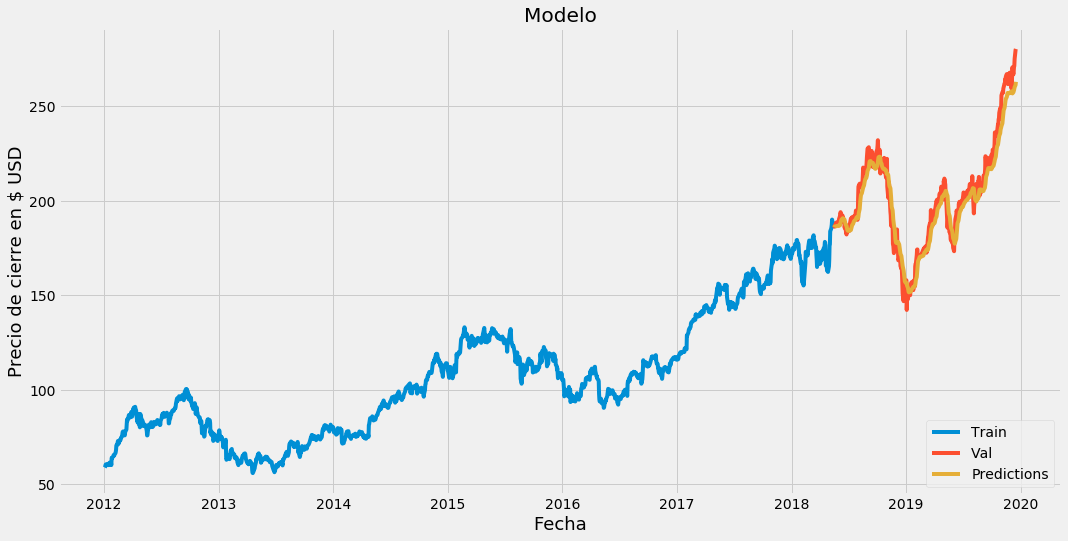

In [33]:
# Graficar los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualizando los datos
plt.figure(figsize=(16,8))
plt.title('Modelo')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio de cierre en $ USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc= 'lower right')
plt.show()

In [34]:
# Muestra los precioss validos y predichos
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,185.989044
2018-05-18,186.309998,186.351639
2018-05-21,187.630005,186.438568
2018-05-22,187.160004,186.497635
2018-05-23,188.360001,186.487625
...,...,...
2019-12-11,270.769989,258.531799
2019-12-12,271.459991,259.316681
2019-12-13,275.149994,260.177582


In [35]:
# Obtenemos la nota
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Se crea el nuevo dataframe
new_df = apple_quote.filter(['Close'])
# Obtenemos los precios de cierre de los 60 dias y convertimos el dataframe en un arreglo
last_60_days = new_df[-60:].values
# Escalando los datos a valores entre 0 y 1
last_60_days_scaled = scaler.transform(last_60_days)
# Creamos una lista vacía
X_test = []
#AGregamos los 60 días pasados
X_test.append(last_60_days_scaled)
# COnvertimos estos datos en un arreglo
X_test = np.array(X_test)
# Reformamos los datos
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Obtenemos los precios predichos
pred_price = model.predict(X_test)
# Deshaciendo el escalamiento
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[264.7474]]


In [36]:
# Obtenemos la nota
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
